In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
# inspect the data frame
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


At here we see that the "Year" column should be a ordinal variable but it is recognized as a numerical variable so we will change it variable type.

In [5]:
df['Year'] = pd.Categorical(df['Year'],df['Year'].unique())
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Country                           96 non-null     object  
 1   Year                              96 non-null     category
 2   Life expectancy at birth (years)  96 non-null     float64 
 3   GDP                               96 non-null     float64 
dtypes: category(1), float64(2), object(1)
memory usage: 3.1+ KB


,Life expectancy at birth (years),GDP
count,96.000000,9.600000e+01
mean,72.789583,3.880499e+12
std,10.672882,5.197561e+12
min,44.300000,4.415703e+09
25%,74.475000,1.733018e+11
50%,76.750000,1.280220e+12
75%,78.900000,4.067510e+12
max,81.000000,1.810000e+13


As we can see now the Dtype of the "Year" column is category

In [6]:
# how many countries are there

countries = df['Country'].unique()
countries

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [7]:
# how many years

years = df['Year'].unique()
years

[2000, 2001, 2002, 2003, 2004, ..., 2011, 2012, 2013, 2014, 2015]
Length: 16
Categories (16, int64): [2000, 2001, 2002, 2003, ..., 2012, 2013, 2014, 2015]

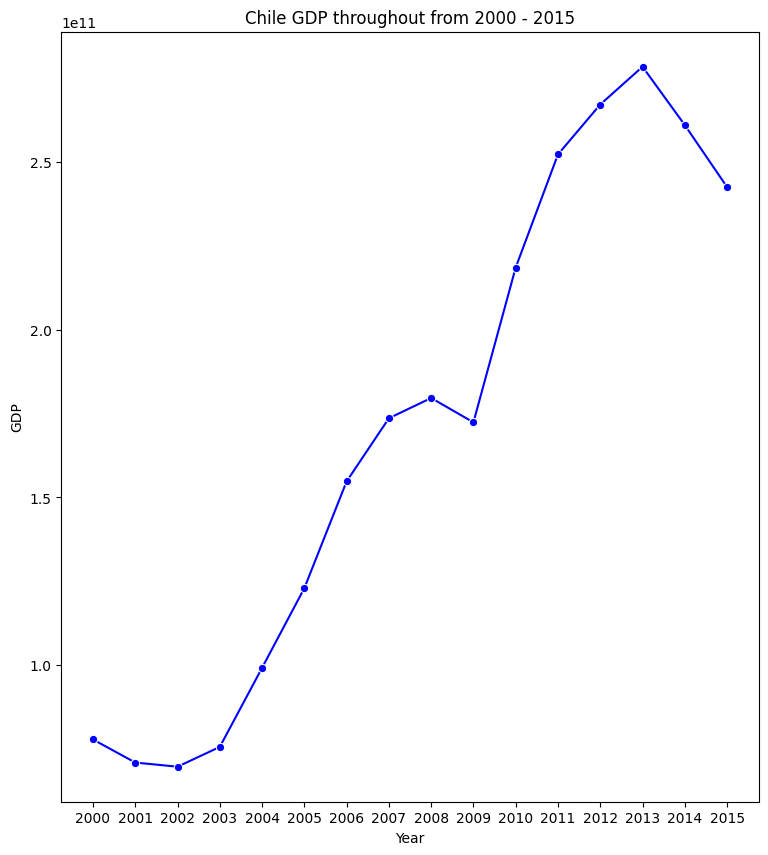

<Figure size 640x480 with 0 Axes>

In [8]:
# inspect the GDP of 6 countries over years

plt.figure(figsize=(9,10))
ax1 = plt.subplot()
chile = df[df['Country'] == 'Chile']
sns.lineplot(data = chile, x = 'Year', y = 'GDP', color = 'blue', marker = 'o')
ax1.set_xticks(years)
ax1.set_xticklabels(years)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('Chile GDP throughout from 2000 - 2015')
plt.show()
plt.clf()

Since the process to create the lineplot showing the growth of GDP in each country from 2000 to 2015 is the same so I will create function to make it easier

In [9]:
# GDP function

def gdp_plot(country_name, line_color):
    plt.figure(figsize=(9,10))
    ax = plt.subplot()
    data = df[df['Country'] == country_name]
    sns.lineplot(data = data, x = 'Year', y = 'GDP', color = line_color, marker = 'o')
    ax.set_xticks(years)
    ax.set_xticklabels(years)
    ax.set_xlabel('Year')
    ax.set_ylabel('GDP')
    ax.set_title( country_name + ' GDP throughout from 2000 - 2015')
    ax.set
    plt.show()
    plt.clf()
    

# Building line plot for 6 countries


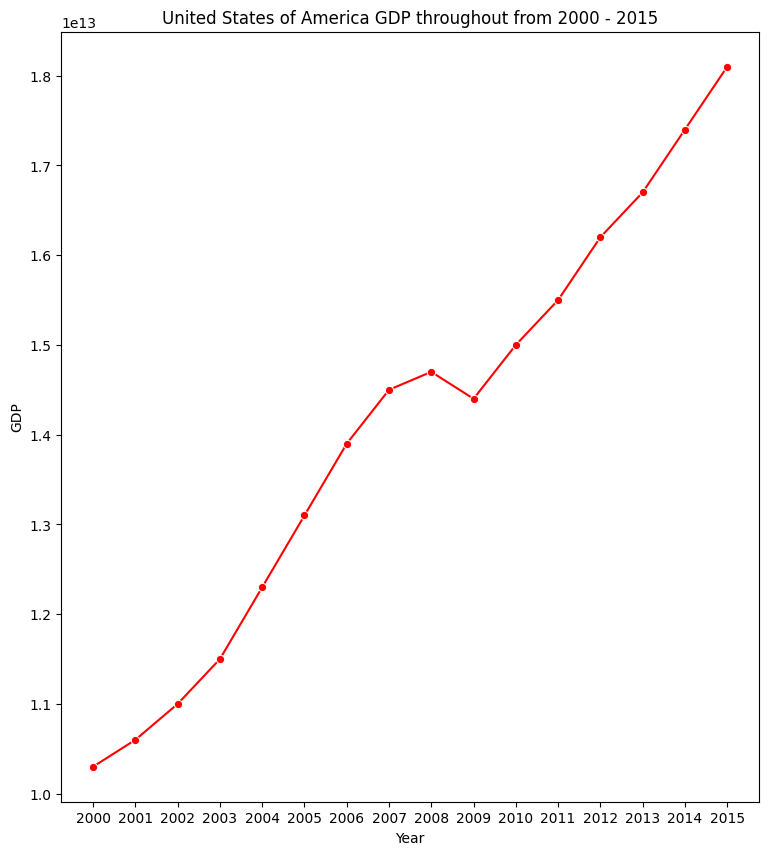

<Figure size 640x480 with 0 Axes>

In [10]:
# United States of America

gdp_plot('United States of America', 'red')

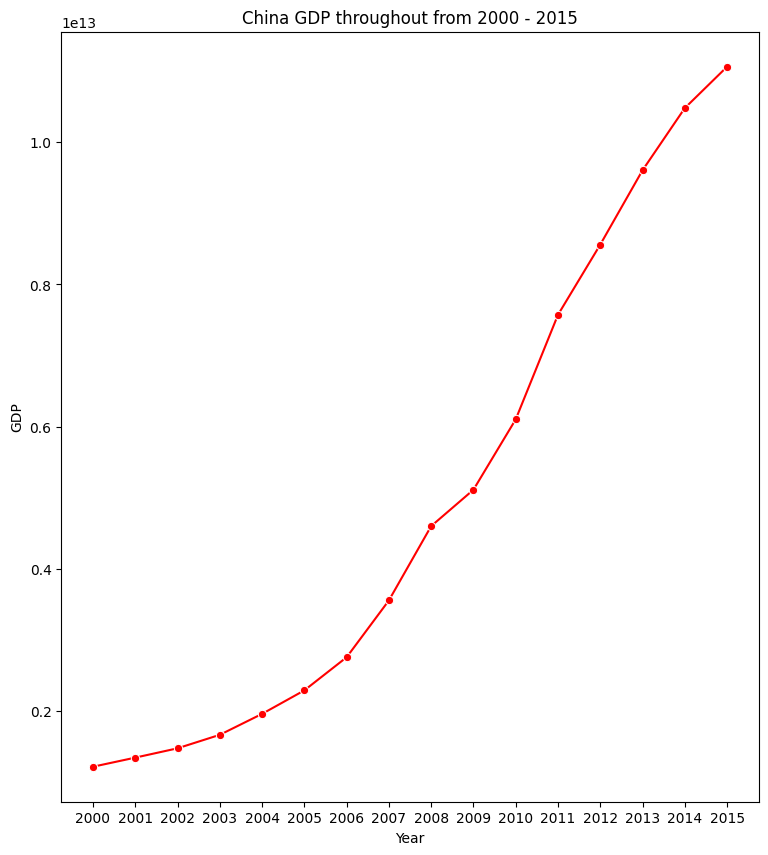

<Figure size 640x480 with 0 Axes>

In [11]:
# China

gdp_plot('China', 'red')

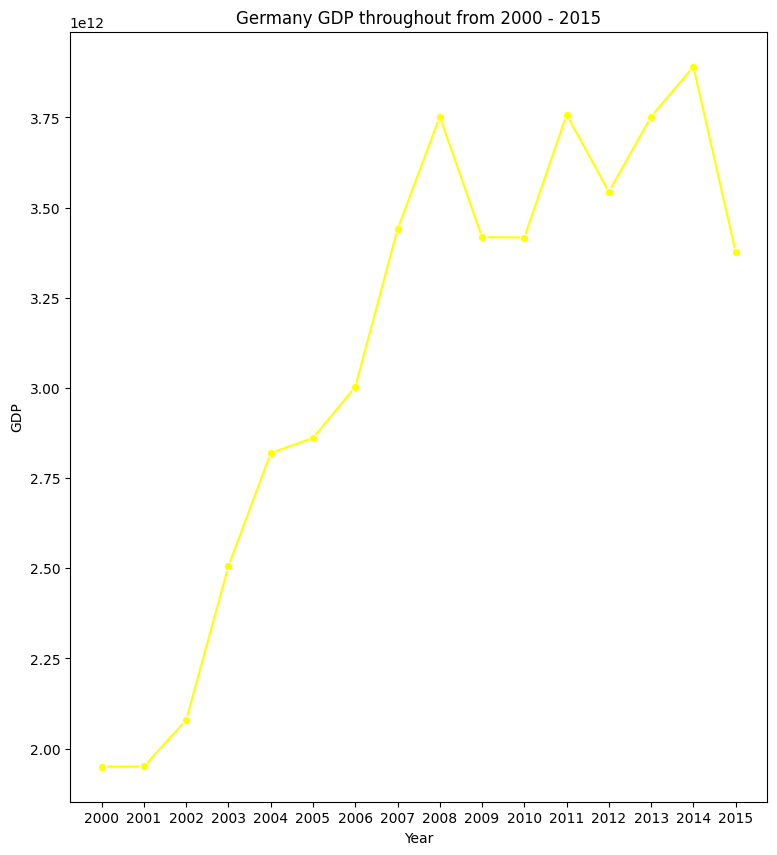

<Figure size 640x480 with 0 Axes>

In [12]:
# Germany

gdp_plot('Germany', 'yellow')

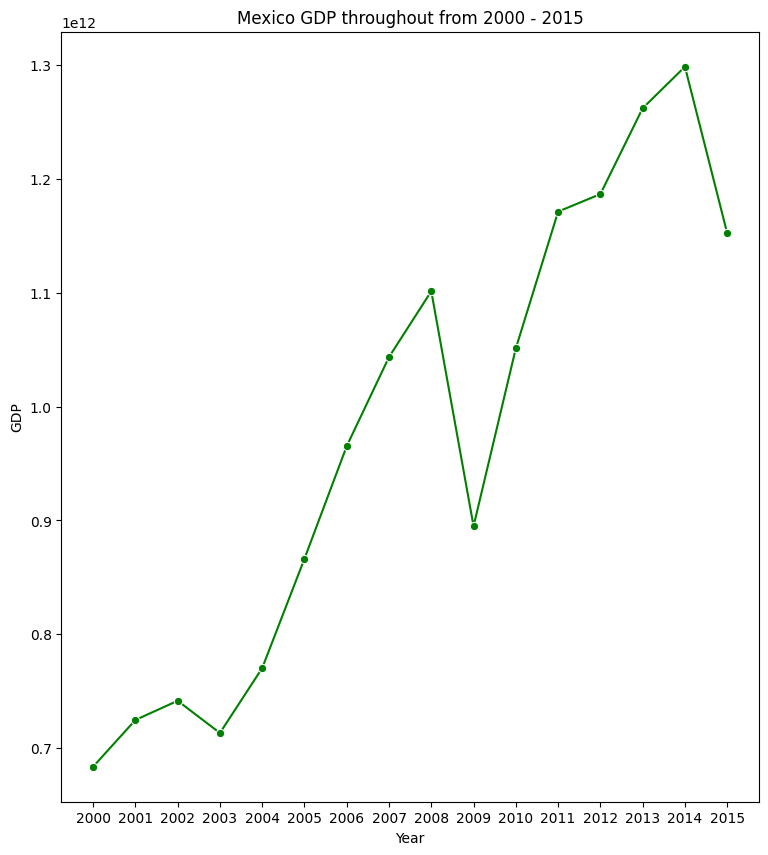

<Figure size 640x480 with 0 Axes>

In [13]:
# Mexico

gdp_plot('Mexico', 'green')

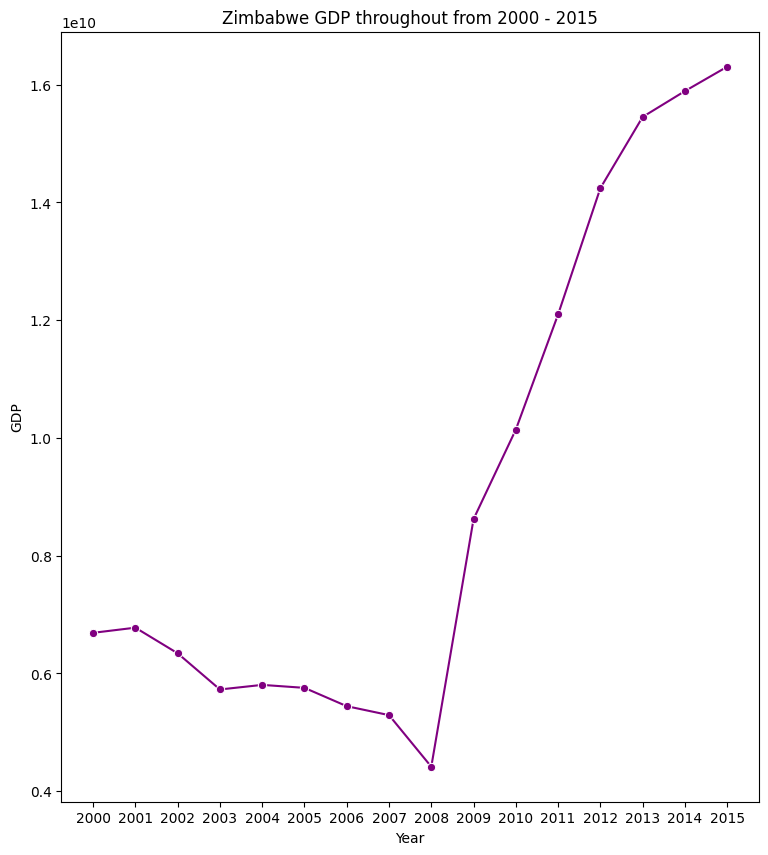

<Figure size 640x480 with 0 Axes>

In [14]:
# Zimbabwe

gdp_plot('Zimbabwe', 'purple')

# Compare the Life Expectancy between each country

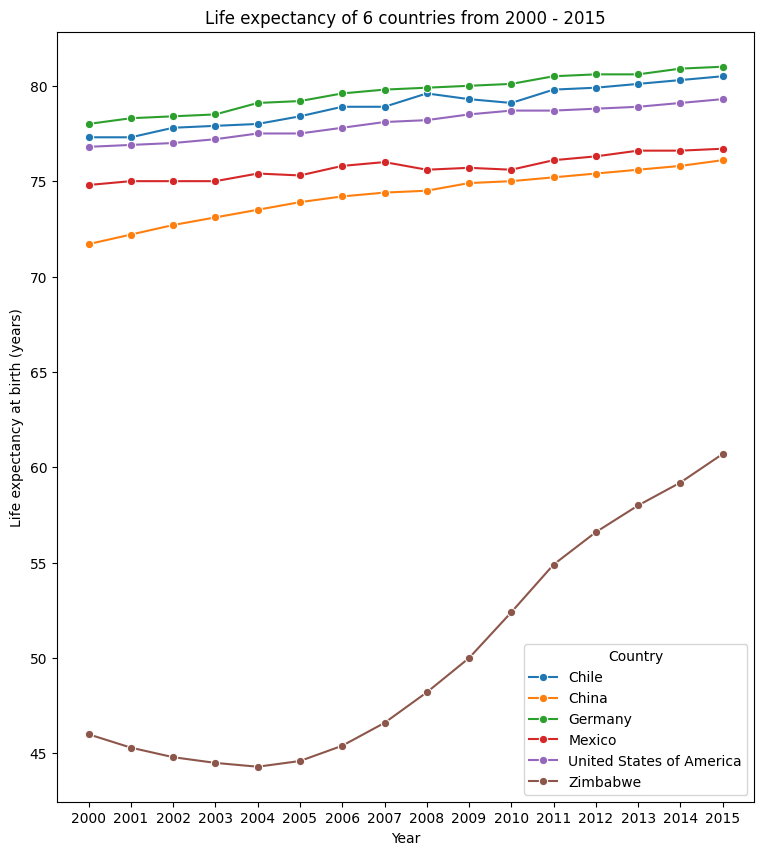

<Figure size 640x480 with 0 Axes>

In [15]:
plt.figure(figsize=(9,10))
ax = plt.subplot()
sns.lineplot(data = df, x = 'Year', y = 'Life expectancy at birth (years)', hue = 'Country', marker = 'o')
ax.set_xticks(years)
ax.set_xticklabels(years)
ax.set_title('Life expectancy of 6 countries from 2000 - 2015')
plt.show()
plt.clf()

# Trends between life expectancy and gdp of each country

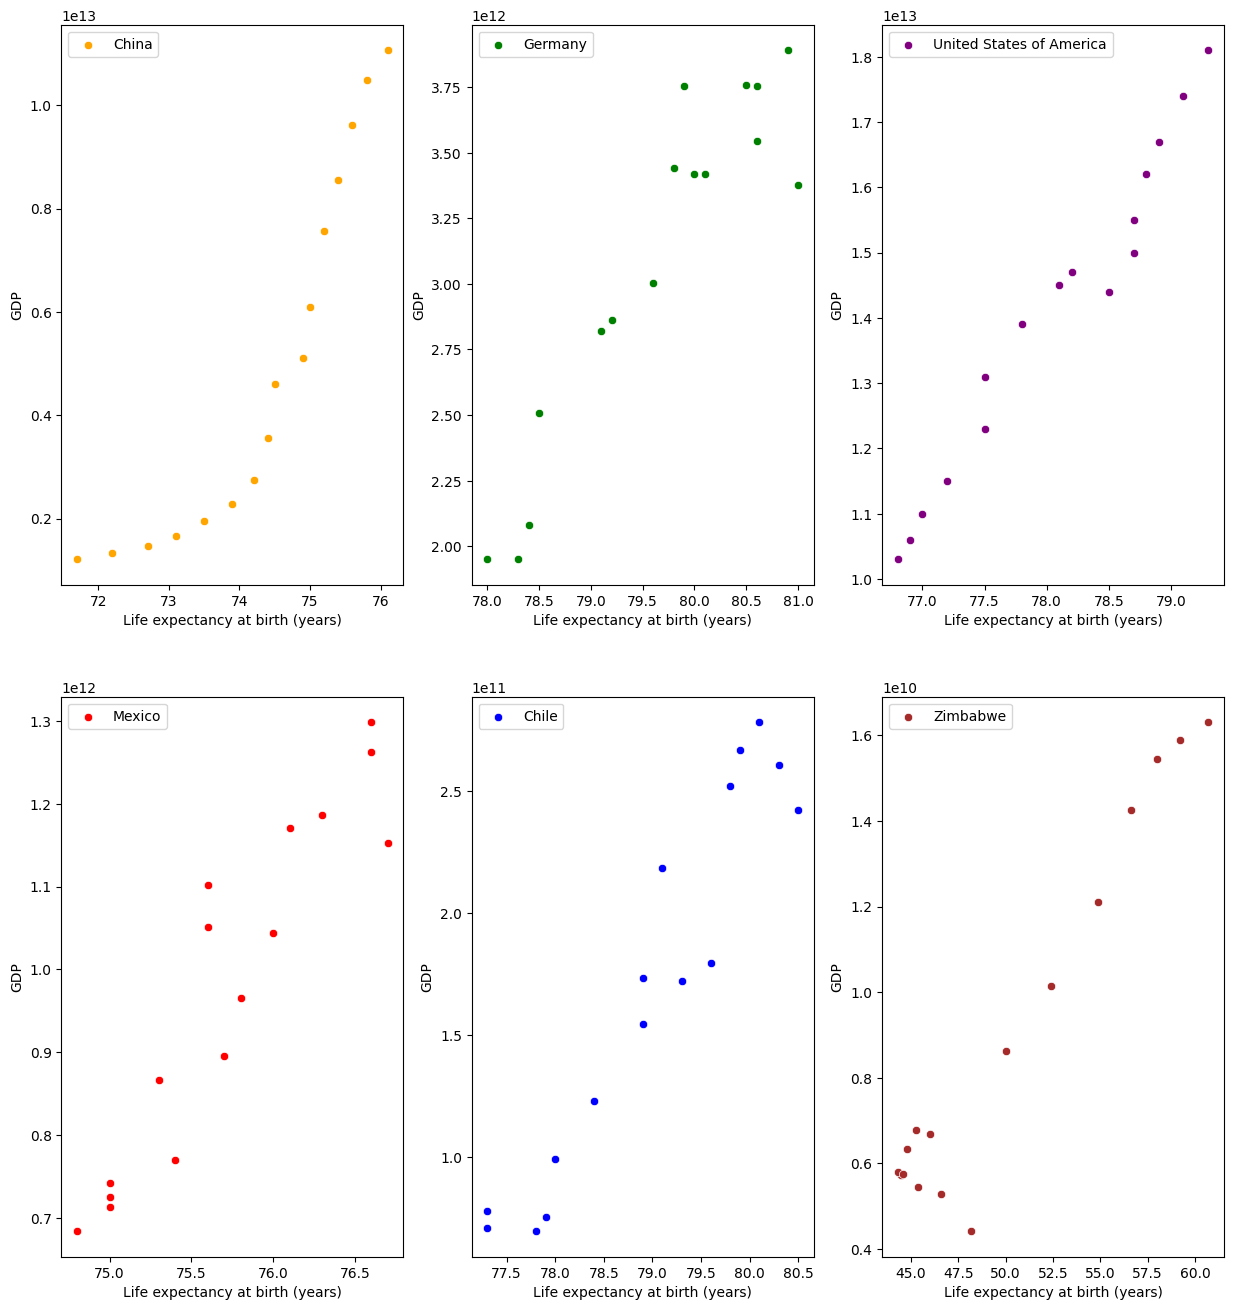

<Figure size 640x480 with 0 Axes>

In [16]:
plt.figure(figsize=(15,16))
ax = plt.subplot(2,3,1)
sns.scatterplot(data = df[df['Country'] == 'China'], x = 'Life expectancy at birth (years)', y = 'GDP', color = 'orange', label = 'China')

ax = plt.subplot(2,3,2)
sns.scatterplot(data = df[df['Country'] == 'Germany'], x = 'Life expectancy at birth (years)', y = 'GDP', color = 'green', label = 'Germany')

ax = plt.subplot(2,3,3)
sns.scatterplot(data = df[df['Country'] == 'United States of America'], x = 'Life expectancy at birth (years)', y = 'GDP', color = 'purple', label = 'United States of America')

ax = plt.subplot(2,3,4)
sns.scatterplot(data = df[df['Country'] == 'Mexico'], x = 'Life expectancy at birth (years)', y = 'GDP', color = 'red', label = 'Mexico')


ax = plt.subplot(2,3,5)
sns.scatterplot(data = df[df['Country'] == 'Chile'], x = 'Life expectancy at birth (years)', y = 'GDP', color = 'blue',label = 'Chile')

ax = plt.subplot(2,3,6)
sns.scatterplot(data = df[df['Country'] == 'Zimbabwe'], x = 'Life expectancy at birth (years)', y = 'GDP', color = 'brown', label = 'Zimbabwe')
plt.legend()
plt.show()
plt.clf()

In [17]:
# Group the data by country
grouped_data = df.groupby('Country')
# Calculate correlation for each country
correlations = grouped_data.apply(lambda x: x['GDP'].corr(x['Life expectancy at birth (years)'])).reset_index()
correlations.columns = ['Country', 'Correlation']
correlations = correlations.sort_values('Correlation')
# Print the correlations
correlations

C:\Users\admin\AppData\Local\Temp\ipykernel_3244\576215436.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = grouped_data.apply(lambda x: x['GDP'].corr(x['Life expectancy at birth (years)'])).reset_index()


,Country,Correlation
1,China,0.908526
3,Mexico,0.932238
2,Germany,0.932699
0,Chile,0.949877
5,Zimbabwe,0.966200
4,United States of America,0.981709


# Insight from the data

- We can see that America and China were the top 2 countries had the most highest, steadiest GDP from 2000-2015 while Zimbabwe had the lowest.
- Despite of that, America and China weren't the twos that had the highest average life expectancy. Germany had first position when it comes to average life expectancy.
- Overall, GDP and Life Expectancy of each countries has very strong positive relationship. It is almost linear.